
## Problem Statement:
     This dataset comes from the UCI repository of machine learning databases.The task is to predict if an individual's 
     annual income excceds $50,000 based on census data.
     Data link:http://www.cs.toronto.edu/~delve/data/adult/desc.html



### Steps for solving the Data Science Problem:

    1. Get the basic understanding of each feature,data types, how many data
    
    2. Exploratory Data Analsis:
       i) Check for output class Distribution to decide the data is balanced or not
      ii) Check for the missing values
     iii) Classify the type of variable : 
                                      i) Categorical Variable
                                     ii) Numerical Variable-> Discrete Numerical Varible
                                                           -> Continuous Numerical Variable
      iv) Check the Cardinality(No. of features) of Categorical Variable
       v) Check for duplicate rows or data points
       vi) Data Visualization :
                              i) Bar chart for Independent feature
                             ii) Bar chart for Categorical variable 
                            iii) Bar Chart for Discrete Numerical Variable
                             iv) Distribution/Histogram plot for countinuous variable 
                              v) Box plot for Continuous varible
                              
     3. Feature Engineeirng  :
                              i) Treating Duplicate rows if any
                             ii) Treating  Missing Values
                            iii) Treating Outliers
                             iv) Convert the categorical variable to numerical data 
                              v) Split the data into train and test or cross val set. X_train,y_train,X_test,y_test
                             vi) Feature Scaling
                            vii) If Data is imbalanced- i) Use oversampling technique
                                                      
                          
     4. Feature Selection: i)By using Information gain(Mutual Information)
     

     5. Model Building:
                              i) Apply machine learning algorithm i.e Logistic Regression and Random Forest classifier 
                             ii) Evaluate the model based on - Precision, Recall and F1 Score by varying various parameter 
                                 and hyperparameter.
                            iii) Draw visualization curve for evaluation metrics for different parameters and hyperparameters.
                            iv) Draw ROC Curve and calculate AUC Score
                             


In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)  # To display all the columns in data set

#handle warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
#Importing the data set
data=pd.read_csv('adult.csv')

In [3]:
#To see top 5 rows of data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 1. Understanding the data

In [4]:
# To get the basic information about each features u,e Dtype and null value count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above it is clear that 6 Features having numerical value and 8 Features having object or String Data type

In [5]:
# To describe the basic information of data by using decribe()
data.describe()  # It give the basic desription about the numerical data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital.gain and Capital.loss feature need to reinvestigated. 

In [6]:
# TO show the dimension of data set. How many data and feature available 
data.shape

(32561, 15)

     32561 Data Set available
     14 independent & 1 Dependent feature

In [7]:
# To print the feature columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### 2. Exploratory Data Analysis

#### 2.1: Checking output class (dependent variable) distribution

In [8]:
# Checking for output feature i.e 'income' class count
data.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [9]:
data.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

    From above it is clear that 75% of data having <=50K income and 25% of data having >50K income.
    Data is imbalanced
    As we have to predict the class having income >50K (i.e Positive class). Need to apply the different algorithm for balancing  the positive class data with negative class data

#### 2.2: Checking for Missing data:

In [10]:
#Checking for missing values
for i in data.columns:
    print('Missing values in "{}" is :{} '.format(i,data[i].isnull().sum()))

Missing values in "age" is :0 
Missing values in "workclass" is :0 
Missing values in "fnlwgt" is :0 
Missing values in "education" is :0 
Missing values in "education.num" is :0 
Missing values in "marital.status" is :0 
Missing values in "occupation" is :0 
Missing values in "relationship" is :0 
Missing values in "race" is :0 
Missing values in "sex" is :0 
Missing values in "capital.gain" is :0 
Missing values in "capital.loss" is :0 
Missing values in "hours.per.week" is :0 
Missing values in "native.country" is :0 
Missing values in "income" is :0 


From above result it shows that there is no null values in data. But, need to reinvestigate the Non Numerical features.Missing values may be in other name or form

In [11]:
# Reinvestigate the categorical features and its unique values:
non_numerical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']
for feature in non_numerical_feature:
    print('Unique category in feature {} :{}\n\n '.format(feature,data[feature].unique()))

Unique category in feature workclass :['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

 
Unique category in feature education :['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

 
Unique category in feature marital.status :['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

 
Unique category in feature occupation :['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

 
Unique category in feature relationship :['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

 
Unique category in feature race :['White' 'Black' 'Asian-Pac-Is

#### Comment:
      From above result it is cleared that Missing data is marked with '?'.
     'workclass', 'occupation' and 'native.country' have missing values that is marked with '?' symbol.

In [12]:
# Find out the feature having missing values contains'?' symbol
missing_value_feature=[feature for feature in non_numerical_feature  if '?' in list(data[feature])]
len(missing_value_feature)

3

In [13]:
missing_value_feature

['workclass', 'occupation', 'native.country']

In [14]:
# Count the missing values 
for feature in missing_value_feature:
    print('Missing value in {} : {} % '.format(feature,np.round(len(data[data[feature]=='?'])*100/len(data[feature]),2 )))

Missing value in workclass : 5.64 % 
Missing value in occupation : 5.66 % 
Missing value in native.country : 1.79 % 


### 2.3: Categorize the independent feature into following bucket:
          1.Categorical feature
          2.Discrete Numerical feature (Condition/Assumption: total number of unique discrete values must be less than 25)
          3.Continuous Numberical feature

In [15]:
# Mapping categorical feature
categorical_feature=[feature for feature in data.drop('income',axis=1).columns if data[feature].dtype=='O']
print('Categorical features: {} '.format(categorical_feature))
print('Total number of categorical features: {} '.format(len(categorical_feature)))

Categorical features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'] 
Total number of categorical features: 8 


In [16]:
#Mapping the all numerical features(discrete+continuous)
numerical_feature=[feature for feature in data.drop('income',axis=1).columns if data[feature].dtype!='O']
print('Total numerical features: {} '.format(numerical_feature))
print('Total number of  numerical features: {} '.format(len(numerical_feature)))

Total numerical features: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'] 
Total number of  numerical features: 6 


In [17]:
#Mapping discrete numerical features
discrete_numerical_feature=[feature for feature in numerical_feature if data[feature].nunique()<25]
print('Total discrete numerical features: {} '.format(discrete_numerical_feature))
print('Total number of discrete numerical features: {} '.format(len(discrete_numerical_feature)))

Total discrete numerical features: ['education.num'] 
Total number of discrete numerical features: 1 


In [18]:
# Mapping continuous numerical feature
continuous_numerical_feature=[feature for feature in numerical_feature if feature not in discrete_numerical_feature]
print('Total continuous numerical features: {} '.format(continuous_numerical_feature))
print('Total number of continuous numerical features: {} '.format(len(continuous_numerical_feature)))


Total continuous numerical features: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'] 
Total number of continuous numerical features: 5 


In [19]:
# Compiled data for features:
feature_dict={'Total Number of Feature':len(data.drop('income',axis=1).columns),
              'Categorical Features':len(categorical_feature),'Discrete numerical feature':len(discrete_numerical_feature),
             'Continuous numerical feature':len(continuous_numerical_feature)}
print(feature_dict)

{'Total Number of Feature': 14, 'Categorical Features': 8, 'Discrete numerical feature': 1, 'Continuous numerical feature': 5}


### 2.4 Check Cardinality for the Categorical Features (Number of unique values in each feature)

In [20]:
for feature in categorical_feature:
    print('Number of unique values in " {} ": {} '.format(feature,data[feature].nunique()))

Number of unique values in " workclass ": 9 
Number of unique values in " education ": 16 
Number of unique values in " marital.status ": 7 
Number of unique values in " occupation ": 15 
Number of unique values in " relationship ": 6 
Number of unique values in " race ": 5 
Number of unique values in " sex ": 2 
Number of unique values in " native.country ": 42 


#### Comment:
     1.For feature having unique values less than 9, one hot encoding to be done
     2.For rest of the features, label encoding to be done
     

### 2.5 Check for Duplicated data sets

In [21]:
duplicate = data[data.duplicated()]
duplicate.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [22]:
len(duplicate)

24

All the 24 data set need to remove from original dataset

### 2.6: Data Visualization

#### 2.6.1: Bar Chart for Indpendent Feature

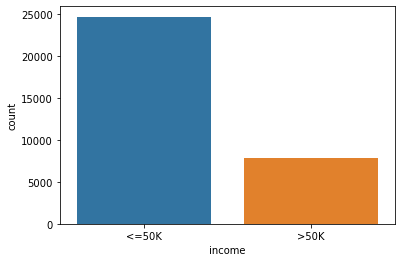

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [23]:
# Bar plot for 'Income' feature 
sns.countplot(data['income'])
plt.show()
data['income'].value_counts(normalize=True)

#### 2.6.2. Bar Chart for Dependent Categorical Features

In [24]:
# Function for plotting bar chart for categorical features
def plot_bar(data,feature,length_plot,width_plot):
    f,ax=plt.subplots(figsize=(length_plot,width_plot))
    sns.countplot(x=feature,data=data,palette='pastel',hue='income',edgecolor='0.6',order=data[feature].value_counts().index)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.title(feature)
    plt.show()
    print(data[feature].value_counts(normalize=True))  # For fraction of each categories present 

                

In [25]:
categorical_feature

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

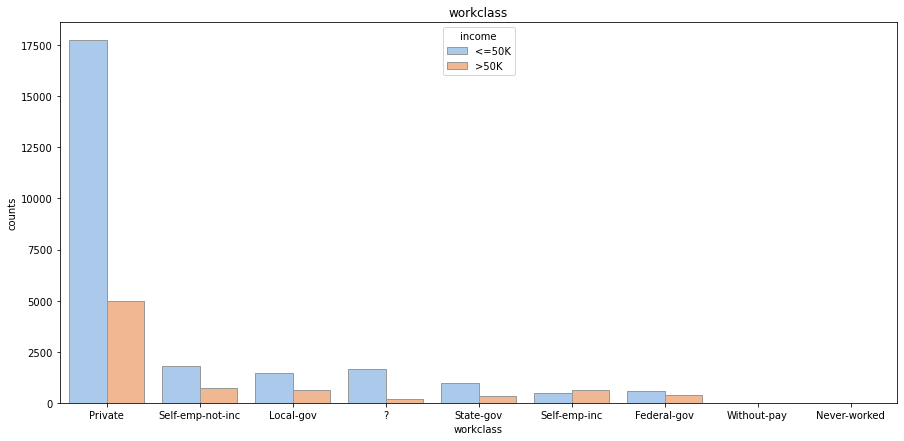

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64


In [26]:
#Bar plot for 'income' vs 'workclass'
plot_bar(data,'workclass',15,7)

### Comments:
     1. 69% of adult working in private firm
     2. 7% of adult is self employed
     3. Never worked class is approx 0.02% , which is very less. So, most of adult is working
     4. Missing values is upto 5.6%, From above plot it seems useful because it have both the class

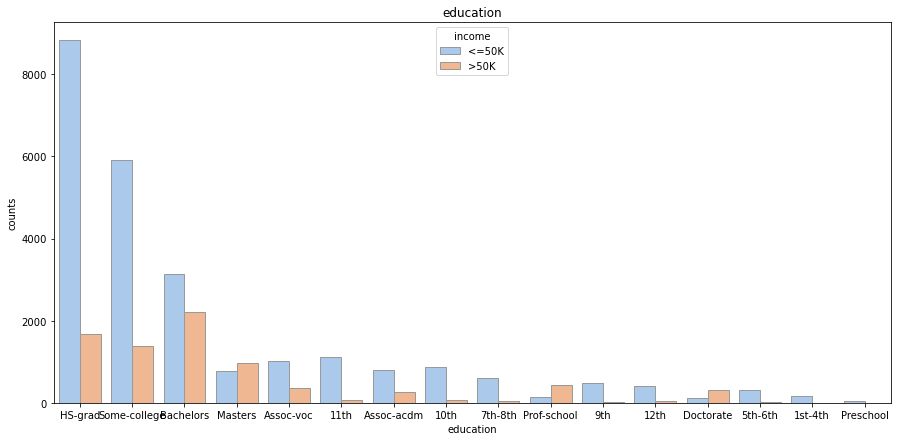

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64


In [27]:
#Bar plot for 'education'
plot_bar(data,'education',15,7)


#### Comments:
     1.Most of adult is High School Graduate i.e 32% and Most of them having income <=50K
     2.16% is Bachelor degree holder and >50K income group is slightly lesser than <=50K income group
     3. 5.2% is Masters degree holder and >50K income group is larger number than <=50K income group

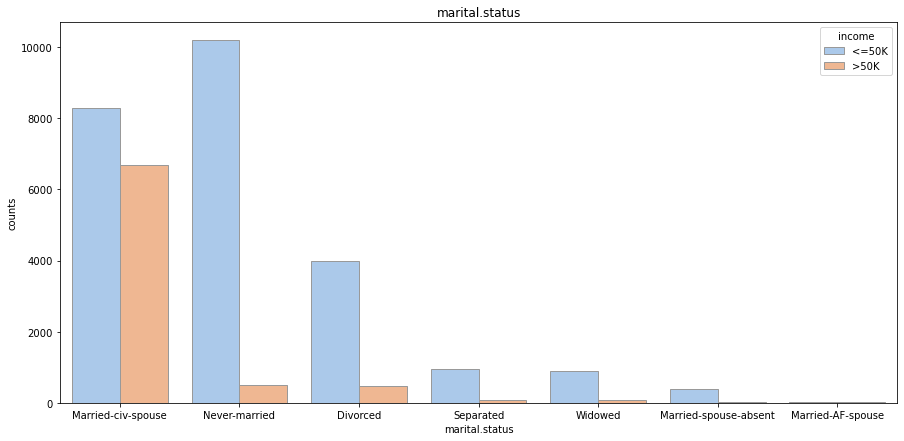

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital.status, dtype: float64


In [28]:
#Bar plot for 'marital.status'
plot_bar(data,'marital.status',15,7)

### Comment:
     1. Married Civ Spouse (Corresponds to Civilian Spouse) have 45% contribution. Both the income group counts have
     minor difference.
     2. 32% is never married and most of them having income <=50K

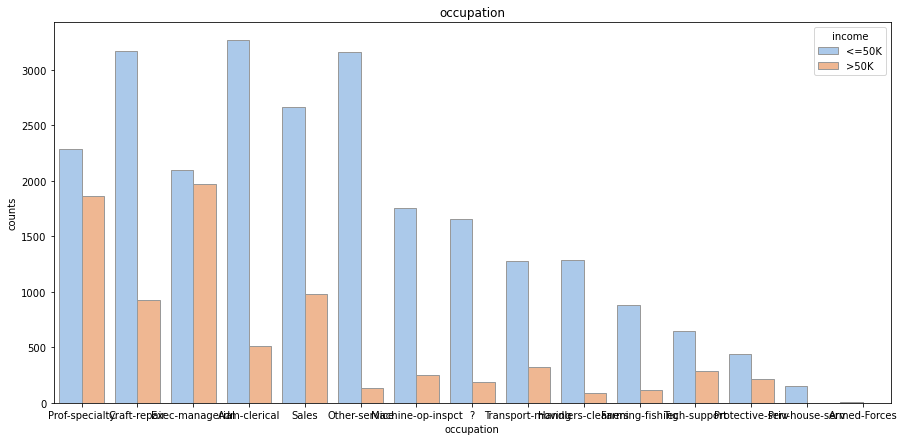

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: occupation, dtype: float64


In [29]:
#Bar plot for 'occupation'
plot_bar(data,'occupation',15,7)

### Comment:
     1.Other-Service and Adm-clerical has the highest proportion of low income
     2.Prof_specialty and Exec-managerial paid really well. Almost 50% of them earning more than 50K
     


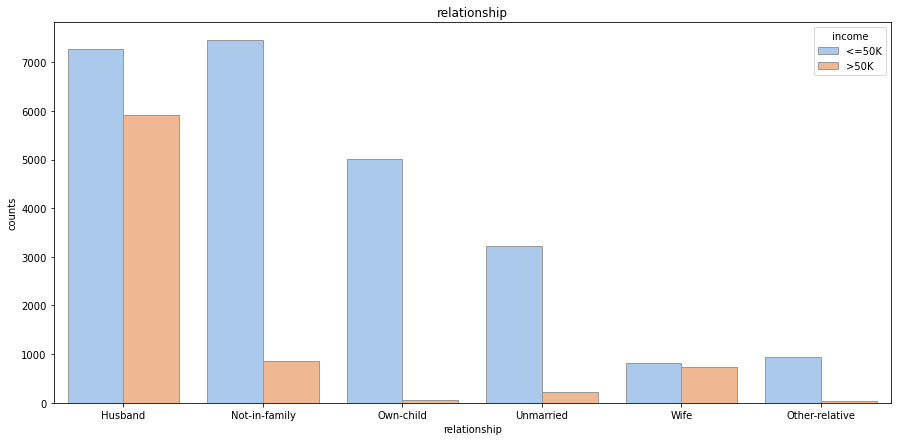

Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: relationship, dtype: float64


In [30]:
#Bar plot for 'relationship'
plot_bar(data,'relationship',15,7)

### Comment:
     1. Most the cases for family with own-child falls under low income group
     2. Most of the high income group is married

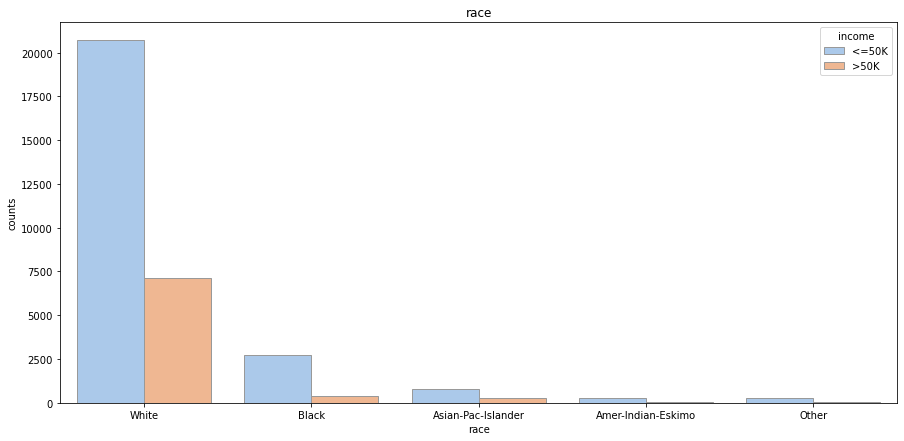

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64


In [31]:
#Bar plot for 'race'
plot_bar(data,'race',15,7)

### Comment:
     1. Most of the adult comes under white race. Contains almost 85%. 
     2. Proportion of High and low income group is in similar proportion irrespective of race
     3. Imbalance data considering different races
     

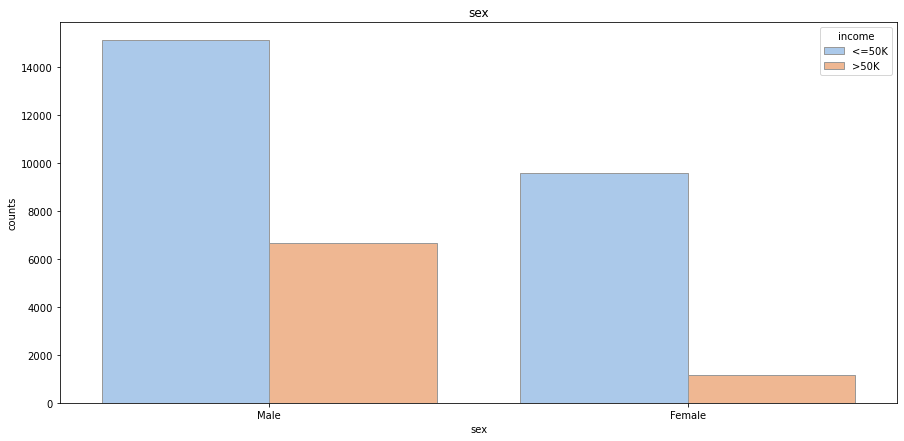

Male      0.669205
Female    0.330795
Name: sex, dtype: float64


In [32]:
#Bar plot for  'sex'
plot_bar(data,'sex',15,7)

## Comment:
    1. Male is more likely to have high income with respect to female.

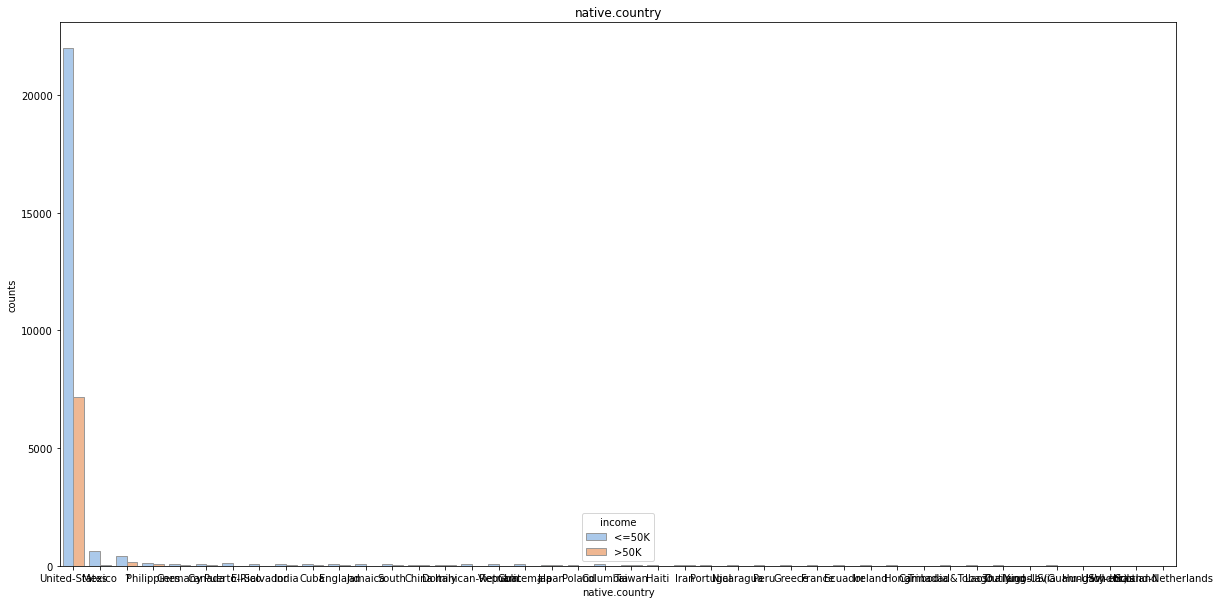

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [33]:
#Bar plot for  'native.country'
plot_bar(data,'native.country',20,10)


### Comment:
     1. Most of having United States as Native country.

#### 2.6.3 Bar Plot for Independent Discrete Numerical Feature

In [34]:
discrete_numerical_feature

['education.num']

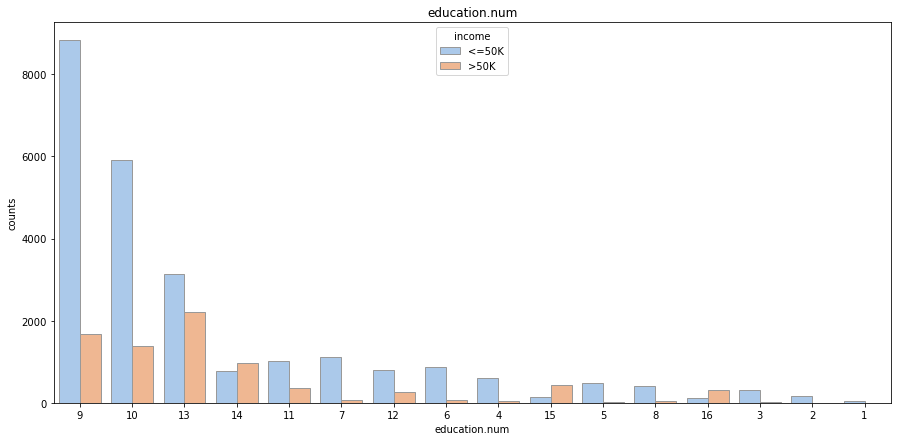

9     0.322502
10    0.223918
13    0.164461
14    0.052916
11    0.042443
7     0.036086
12    0.032769
6     0.028654
4     0.019840
15    0.017690
5     0.015786
8     0.013298
16    0.012684
3     0.010227
2     0.005160
1     0.001566
Name: education.num, dtype: float64


In [35]:
# Plot the discrete feature bar plot
plot_bar(data,'education.num',15,7)

#### Comment:
     1. Higher education number correponds to higher income group

#### 2.6.4. Distribution plot for Independent Continuous Numerical Features

In [36]:
continuous_numerical_feature

['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

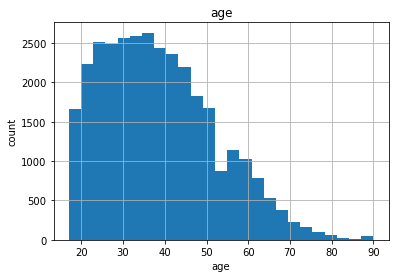

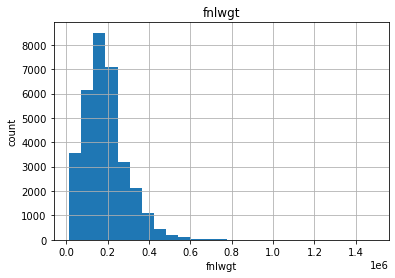

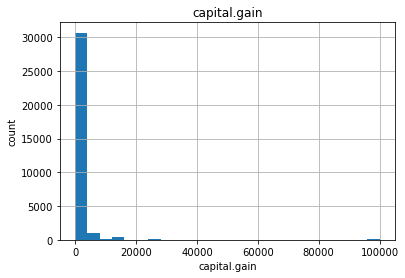

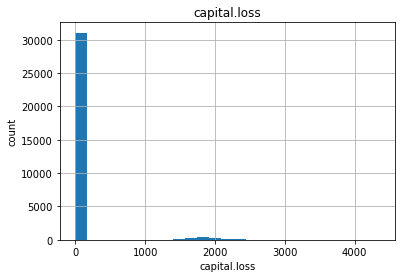

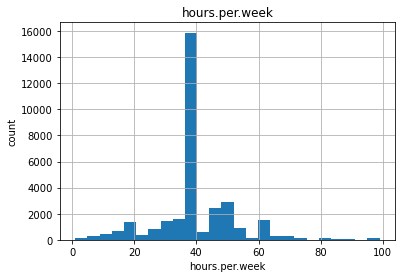

In [37]:
## Lets analyse the continuous feature value by creating histograms to understand the distribution
for feature in continuous_numerical_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

### Comment:
     1. 'age' and 'fnlwgt' features having right skewed distribution.
         Need to normalize before training
     2.  Rest of the feature doesn't follow any distribution
     3.  For better visualization we can draw the distribution curve for each output class

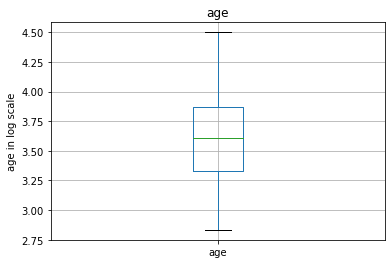

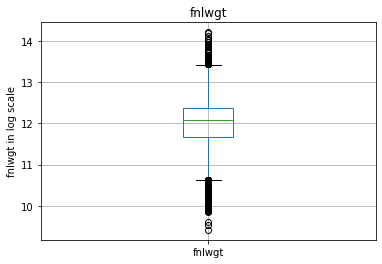

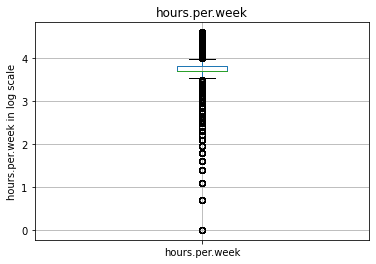

In [38]:
for feature in continuous_numerical_feature:
    data_=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data_[feature]=np.log(data_[feature])
        data_.boxplot(column=feature)
        plt.ylabel(feature+str(' in log scale'))
        plt.title(feature)
        plt.show()

#### Comment:
     1.Outliers present in 'fnlwgt' and 'hours.per.week'

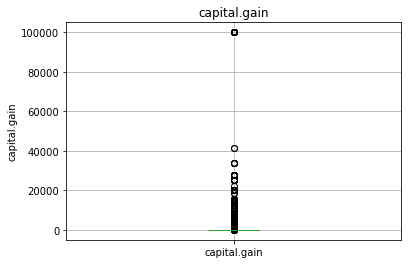

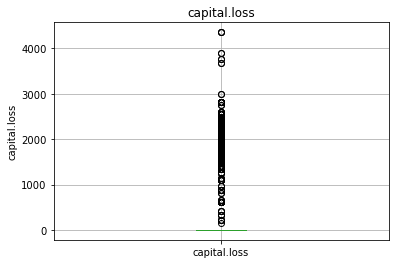

In [39]:
for feature in continuous_numerical_feature:
    data_=data.copy()
    if 0 in data[feature].unique():
        data_.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    else:
        pass


In [40]:
# Number of zero values counts in capital.gain 
len(data[data['capital.gain']==0])

29849

In [41]:
# Number of zero values counts in capital.gain 
len(data[data['capital.loss']==0])

31042

In [42]:
# Fraction of data having 0 capital.gain
len(data[data['capital.gain']==0])/len(data)

0.9167101747489328

In [43]:
# Fraction of data having 0 capital.loss
len(data[data['capital.loss']==0])/len(data)

0.9533490986149074

### Comment:
     1.Majority of Data having zero capital.gain and capital.loss 

In [44]:
## Output class distribution when there is non zero capital gain
data[data['capital.gain']>0].income.value_counts(normalize=True)

>50K     0.618363
<=50K    0.381637
Name: income, dtype: float64

In [45]:
## Output class distribution when there is non zero captial loss
data[data['capital.loss']>0].income.value_counts(normalize=True)

>50K     0.508887
<=50K    0.491113
Name: income, dtype: float64

### Comment:
     1. For capital.loss and capital.gain have non zero values, the output class distribution is
     almost same.  

# 3. Feature Engineering

### 3.1. Treating duplicate rows

In [46]:
# train_data- New DataFrame is defined and we will work on this data frame for feature engineering
train_data=data.drop_duplicates()
train_data.reset_index()

,index,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32533,32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32534,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32535,32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [47]:
print('Train Data set count:{} and Original Dataset count: {}'.format(len(train_data),len(data)))

Train Data set count:32537 and Original Dataset count: 32561


#### 3.2 Treating Missing values:

In [48]:
# As we know from data analysis, there is data missing in Categorical Features only.
# We will replace each missing i.e '?' data with 'Missing Values' and will also add extra column to capture the particular row had missing values
## Replace mising value with a new label and will act as new category
def replace_cat_feature(data_set,feature):
    data_set['Missing_'+feature]=np.where(data_set[feature]=='?',1,0)
    data_set[feature]=data_set[feature].replace('?','Missing')
    return data_set

In [49]:
for feature in missing_value_feature:
    train_data=replace_cat_feature(train_data,feature)

C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\813591227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Missing_'+feature]=np.where(data_set[feature]=='?',1,0)
C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\813591227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set[feature]=data_set[feature].replace('?','Missing')
C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\813591227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

### 3.3 Treating Outliers:

In [50]:
# Based on Exploratory analysis, we are removing outilerliers from 'hours.per.week' column.
# Calculate median
Median=train_data['hours.per.week'].median()
# Calculation Q1 and Q3 i.e 25 and 75 percentile respectively
Q1,Q3=np.percentile(train_data['hours.per.week'],[25,75])
IQR=Q3-Q1  # Interquartile range
Maximum=Q3+1.5*IQR
Minimum=Q1-1.5*IQR
print("Median:{} \nQ1:{} \nQ3:{} \nIQR:{} \nMaximum:{} \nMinimum:{} ".format(Median,Q1,Q3,IQR,Maximum,Minimum))

Median:40.0 
Q1:40.0 
Q3:45.0 
IQR:5.0 
Maximum:52.5 
Minimum:32.5 


In [51]:
#No. of data in 'hours.per.week' is greater than maximum value\
len(data[data['hours.per.week']>Maximum])

3492

In [52]:
#No. of data in 'hours.per.week' is greater than maximum value\
len(data[data['hours.per.week']<Minimum])

5516

In [53]:
# Replacing the the outliers with Median
train_data['hours.per.week']=np.where(train_data['hours.per.week']>Maximum,Median,train_data['hours.per.week'])
train_data['hours.per.week']=np.where(train_data['hours.per.week']<Minimum,Median,train_data['hours.per.week'])


C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\1635989615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hours.per.week']=np.where(train_data['hours.per.week']>Maximum,Median,train_data['hours.per.week'])
C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\1635989615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hours.per.week']=np.where(train_data['hours.per.week']<Minimum,Median,train_data['hours.per.week'])


### 3.4: Converting Categorical variable to numerical data

In [54]:
train_data[categorical_feature].nunique()

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
dtype: int64

In [55]:
def categorical_numerical(data,feature_dict):
    for feature in feature_dict: 
        data[feature].replace(feature_dict[feature],[i for i in range(len(feature_dict[feature]))],inplace=True)
    return data

In [56]:
feature_dict={}   # Dictionary for independent categorical feature
for feature in categorical_feature:
    feature_dict[feature]=train_data[feature].value_counts().sort_values(ascending=False).index

In [57]:
train_data=categorical_numerical(train_data,feature_dict)

C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\4135267212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].replace(feature_dict[feature],[i for i in range(len(feature_dict[feature]))],inplace=True)


In [58]:
### Now convert the Dependent feature to numerical feature
train_data=train_data.replace(['>50K','<=50K'],[1,0])  # Replacing >50K with 1 and <=50K into 0 class

#### 3.5. Feature scaling

In [59]:
# All the idependent feature scaling
independent_feature=train_data.drop('income',axis=1).columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train_data[independent_feature].values)
train_data[independent_feature]=sc.transform(train_data[independent_feature].values)

In [60]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Missing_workclass,Missing_occupation,Missing_native.country
0,3.770003,1.297859,-1.067955,-0.768442,-0.420679,2.833985,0.879248,-0.167148,-0.353418,1.422436,-0.145975,10.589625,-0.324797,-0.232846,0,4.089215,4.080976,-0.134956
1,3.183397,-0.546419,-0.539159,-0.768442,-0.420679,2.833985,-0.654928,-0.167148,-0.353418,1.422436,-0.145975,10.589625,-0.324797,-0.232846,0,-0.244546,-0.245039,-0.134956
2,2.010185,1.297859,-0.035241,-0.456231,-0.031815,2.833985,0.879248,1.303711,1.240367,1.422436,-0.145975,10.589625,-0.324797,-0.232846,0,4.089215,4.080976,-0.134956
3,1.130276,-0.546419,-0.468210,1.729247,-2.364998,1.013896,0.572413,1.303711,-0.353418,1.422436,-0.145975,9.458380,-0.324797,-0.232846,0,-0.244546,-0.245039,-0.134956
4,0.177041,-0.546419,0.709415,-0.456231,-0.031815,1.923940,-1.268599,0.568281,-0.353418,1.422436,-0.145975,9.458380,-0.324797,-0.232846,0,-0.244546,-0.245039,-0.134956


#### 3.6.Split the data by using train_test_split

In [61]:
# Split the data into training and cross validation or test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data.drop('income',axis=1),train_data.income,test_size=0.2,random_state=20)



#### 3.7. Oversampling of Minority class data 

In [62]:
# Function for data resampling
def data_resampling(X_training,y_training,random_state):
    from sklearn.utils import resample
    #combine them back for resampling
    train_data = pd.concat([X_training, y_training], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data.income==0]
    positive = train_data[train_data.income==1]
    # upsample minority
    pos_upsampled = resample(positive,
                             replace=True, # sample with replacement
                             n_samples=len(negative), # match number in majority class
                             random_state=random_state) # reproducible results
    # combine majority and upsampled minority
    upsampled = pd.concat([negative, pos_upsampled])
    # check new class counts
    upsampled.income.value_counts()
    return upsampled

In [63]:
#Data resampling for minor class data
upsampled_data=data_resampling(X_train,y_train,random_state=40)
upsampled_data=upsampled_data.dropna()  # To drop null values generated during upsampling
upsampled_data.reset_index()
X_train=upsampled_data.drop('income',axis=1)
y_train=upsampled_data.income

# 4. Feature Selection:
      Feature Selection by using the Mutual Information (As target variable is discrete)

In [64]:
feature=train_data.drop('income',axis=1).columns
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(train_data[feature],train_data.income)
mi

array([0.06942878, 0.0171199 , 0.03332991, 0.062398  , 0.06002558,
       0.11055936, 0.06401219, 0.11631248, 0.008364  , 0.0278043 ,
       0.0855344 , 0.03670716, 0.01337819, 0.00726747, 0.00465044,
       0.00752086, 0.00214275])

In [65]:
MI_df=pd.DataFrame({'feature':feature,'MI_Score':mi})
MI_df.sort_values(by='MI_Score',ascending=False)

,feature,MI_Score
7,relationship,0.116312
5,marital.status,0.110559
10,capital.gain,0.085534
0,age,0.069429
6,occupation,0.064012
3,education,0.062398
4,education.num,0.060026
11,capital.loss,0.036707
2,fnlwgt,0.033330
9,sex,0.027804


In [66]:
top_10_index=MI_df['MI_Score'].sort_values(ascending=False).head(10).index
top_10_feature=[feature[i] for i in top_10_index]
top_10_feature

['relationship',
 'marital.status',
 'capital.gain',
 'age',
 'occupation',
 'education',
 'education.num',
 'capital.loss',
 'fnlwgt',
 'sex']

# 5. Model Building


##  5.1: General Function will be used for the Logistic Regression 

In [67]:
def sigmoid(X_train,B,B0):
    z=np.dot(X_train,B)+B0
    a=1/(1+np.exp(-z))
    return a

In [68]:
def logistic_cost(y_train,a,one_,L1_Reg,L2_Reg,B):
    L1_cost=(L1_Reg/len(y_train))*np.sum(np.where(B>0,B,-B))
    L2_cost=(L2_Reg/(2*len(y_train)))*np.sum(B**2)
    j_=-(np.dot(y_train.T,np.log(a))+np.dot((one_-y_train).T,np.log(one_-a)))/len(y_train)
    j=j_+L1_cost+L2_cost
    return j

In [69]:
def logistic_derivative(X_train,y_train,a,L1_Reg,L2_Reg,B):
    dB0=np.mean(a-y_train)
    L1_der=(L1_Reg/len(y_train))*np.sum(np.where(B>0,1,-1))  # L1 Derivative term
    L2_der=(L2_Reg/len(y_train))*np.sum(B)                   # L2 Derivative term
    dB=((np.dot(X_train.T,(a-y_train)))/len(y_train))+L1_der+L2_der
    return dB0,dB
    

In [70]:
# k is epoch,L1_Reg: Const term for L1 Regularization, L2_Reg- Const term for L2 Regularization, lambda_: Learning rate
# j_arr- saving cost value after each iteration
def logistic_regression_training(X_train,y_train,epoch,alpha,L1_Reg,L2_Reg):
    # Weight_initialization
    #z=XB+B0    Where B=[B1,B2,....,Bm]  m is no of feature 
    B0=np.random.randn()
    B=np.random.randn(X_train.shape[1],1)
    y_train=np.array(y_train)
    y_train=y_train.reshape(len(y_train),1)
    one_=np.ones((len(y_train),1))
    #initial cost value calculation
    a=sigmoid(X_train,B,B0)
    j_prev=logistic_cost(y_train,a,one_,L1_Reg,L2_Reg,B)
    j_arr=[]   # for saving cost value after each iteration
    
    for i in range(epoch):
        #Derivative term calculation
        dB0,dB=logistic_derivative(X_train,y_train,a,L1_Reg,L2_Reg,B)
        #Weight updates:
        B0=B0-alpha*dB0
        B=B-alpha*dB
        #Calculation of y
        a=sigmoid(X_train,B,B0)
        j=logistic_cost(y_train,a,one_,L1_Reg,L2_Reg,B)
        
        if j_prev-j>0.0000001:# Here tau=j_prev-j
            j_arr.append(j_prev)
            j_prev=j
            continue
        else:
            print('Loop is broke at: {} epoch'.format(i))
            break
    return B0,B,j,j_arr


In [71]:
def logistic_classification(X_test,B,B0):
    z=np.dot(X_test,B)+B0
    a=1/(1+np.exp(-z))
    y_pred=np.where(a>0.5,1,0)
    return y_pred

In [72]:
#function for calculation of Precision, Recall and F1_Score
def model_evaluation(y_test,y_pred):
    from sklearn.metrics import accuracy_score,confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Precision=tp/(tp+fp)
    Recall=tp/(tp+fn)
    F1_score=2*Precision*Recall/(Precision+Recall)
    return Accuracy,Precision,Recall,F1_score
    

## 5.2. Logistic Regression by Using all the feature (Without Regularization, with oversampling minor class)

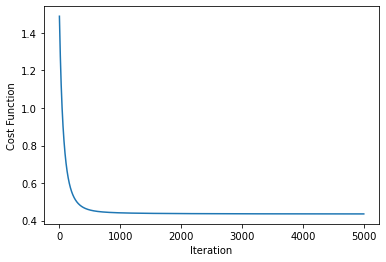

for learning_rate: 0.05 and L1 Regularization const:0 
Loop is broke at: 3544 epoch


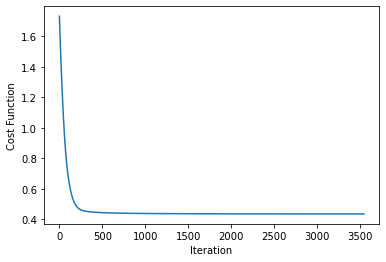

for learning_rate: 0.1 and L1 Regularization const:0 
Loop is broke at: 826 epoch


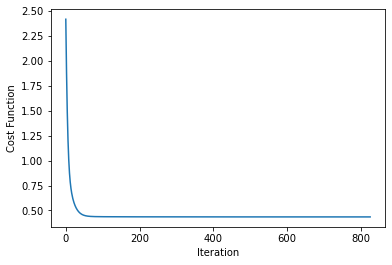

for learning_rate: 0.5 and L1 Regularization const:0 
Loop is broke at: 535 epoch


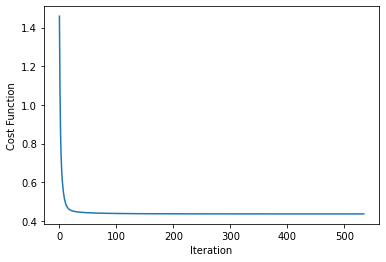

for learning_rate: 1 and L1 Regularization const:0 
Loop is broke at: 376 epoch


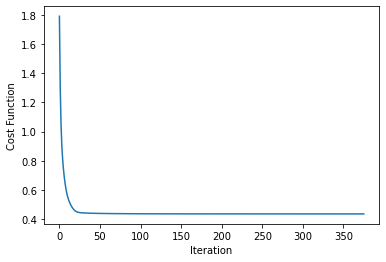

for learning_rate: 1.5 and L1 Regularization const:0 
Loop is broke at: 272 epoch


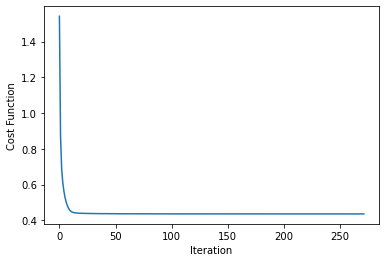

for learning_rate: 2 and L1 Regularization const:0 
Loop is broke at: 0 epoch


C:\Users\ahmad106\AppData\Local\Temp\ipykernel_3084\3300208639.py:4: RuntimeWarning: divide by zero encountered in log
  j_=-(np.dot(y_train.T,np.log(a))+np.dot((one_-y_train).T,np.log(one_-a)))/len(y_train)


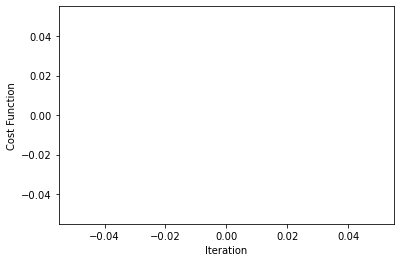

for learning_rate: 10 and L1 Regularization const:0 


In [73]:
k=5000  # Number of epoch
alpha=[0.05,.1,0.5,1,1.5,2,10]  #Learing Rate
L1_Reg=0 #Regularization constan is zero
L2_Reg=0 #Regularization constan is zero
Final_cost=[]  # for saving final cost at different value of lambda
Accuracy_train=[]  # For logging accuracy on training set
Accuracy_test=[]   # For logging accuracy on test set
Precision_test=[]  # For logging Precision on test set
Recall_test=[]     # For logging Recall on test set
F1_score_test=[]   # For logging F1_Score on test set
for i in alpha:
    B0,B,j,j_arr=logistic_regression_training(X_train,y_train,k,i,L1_Reg,L2_Reg)
   
    # For plotting the curve:
    f=[itr for itr in range(len(j_arr))]
    jp=np.array(j_arr)
    jp=jp.reshape((len(jp),1))
    plt.plot(f,jp)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function')
    plt.show()
    print('for learning_rate: {} and L1 Regularization const:{} '.format(i,L1_Reg))
    # Logging Final Cost
    Final_cost.append(j.tolist())
    # Model evaluation on training set
    y_pred_train=logistic_classification(X_train,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_train,y_pred_train)
    Accuracy_train.append(Accuracy)
    # Model Evaluation on training set
    y_pred=logistic_classification(X_test,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_test,y_pred)
    Accuracy_test.append(Accuracy)
    Precision_test.append(Precision)
    Recall_test.append(Recall)
    F1_score_test.append(F1_score)

In [74]:
evaluation_df=pd.DataFrame({'Learing_rate':alpha,'Final Cost':Final_cost,'Training Accuracy':Accuracy_train,'Accuracy_Test':Accuracy_test,'Precision_Test':Precision_test,'Recall_test':Recall_test,'F1_Score_test':F1_score_test})
evaluation_df

,Learing_rate,Final Cost,Training Accuracy,Accuracy_Test,Precision_Test,Recall_test,F1_Score_test
0,0.05,[[0.43573829283742066]],0.797617,0.797480,0.566154,0.795553,0.661531
1,0.10,[[0.43550627231181527]],0.797844,0.797480,0.566212,0.794935,0.661357
2,0.50,[[0.43543941947914916]],0.798072,0.797941,0.566901,0.795553,0.662041
3,1.00,[[0.4354342263147361]],0.797945,0.798095,0.567092,0.796170,0.662384
4,1.50,[[0.4354312482460848]],0.798021,0.798095,0.567092,0.796170,0.662384
5,2.00,[[0.4354357213444051]],0.798046,0.798248,0.567282,0.796788,0.662728
6,10.00,[[nan]],0.760387,0.701137,0.448122,0.869673,0.591472


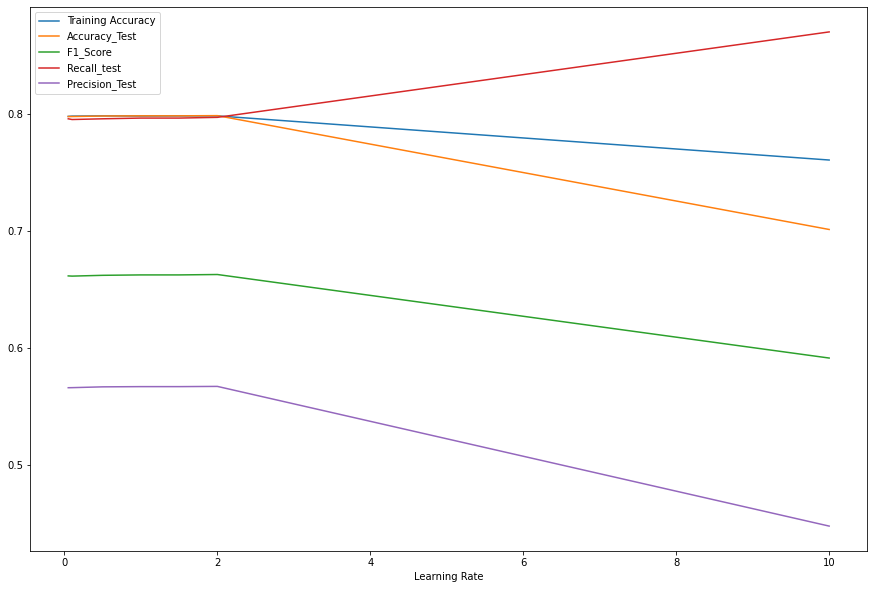

In [75]:
# Draw the curve for learning Rate vs F1_score
f,ax=plt.subplots(figsize=(15,10))
plt.plot(alpha,evaluation_df['Training Accuracy'])
plt.plot(alpha,evaluation_df['Accuracy_Test'])
plt.plot(alpha,evaluation_df['F1_Score_test'])
plt.plot(alpha,evaluation_df['Recall_test'])
plt.plot(alpha,evaluation_df['Precision_Test'])
plt.legend(['Training Accuracy','Accuracy_Test','F1_Score','Recall_test','Precision_Test'])
plt.xlabel('Learning Rate')
plt.show()


Loop is broke at: 1158 epoch


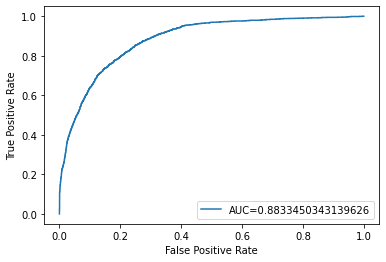

In [79]:
# AUC_ROC for learning rate=2
B0,B,j,j_arr=logistic_regression_training(X_train,y_train,k,alpha=2,L1_Reg=2,L2_Reg=0)  # j is the final cost, J_arr store cost after each iteration
y_score=sigmoid(X_test,B,B0)    # Map the probability for getting class 1 for each test case
#define metrics
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Comment on Result:
    1. For Learning Rate form 0.2 to 2, Evaluation metrics stays constant.
    2. Based on above result, Best learning rate is 2. (Because Faster learning without sacrificing Recall, Precision and
       F1  Score
    3. AUC Score is .8833 for the learning rate=2 L1_Reg=0, L2_Reg=0

## 5.3. Logistic Regression by Using all the feature (With L1 Regularization, with oversampling minor class)

Loop is broke at: 292 epoch


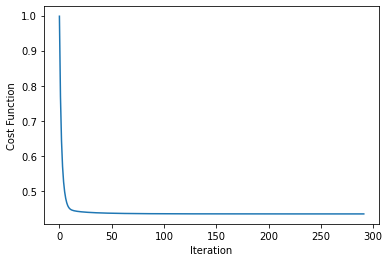

for learning_rate: 2 and L1 Regularition const:0.1 
Loop is broke at: 290 epoch


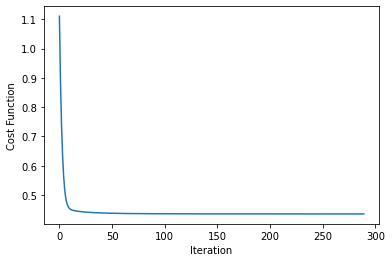

for learning_rate: 2 and L1 Regularition const:1 
Loop is broke at: 337 epoch


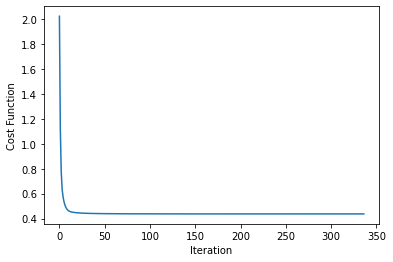

for learning_rate: 2 and L1 Regularition const:10 
Loop is broke at: 190 epoch


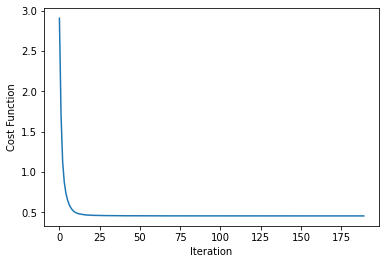

for learning_rate: 2 and L1 Regularition const:100 
Loop is broke at: 15 epoch


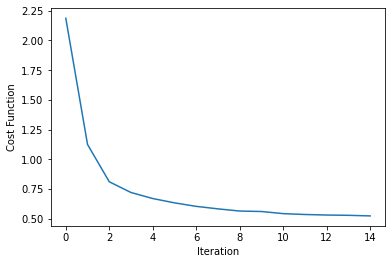

for learning_rate: 2 and L1 Regularition const:500 


In [80]:
# Training the the model: with L1 Regularization
k=5000  # Number of epoch
alpha=2  #Learing Rate
L1_Reg=[0.1,1,10,100,500]
L2_Reg=0 #Regularization constan is zero
Final_cost=[]  # for saving final cost at different value of lambda
Accuracy_train=[]  # For logging accuracy on training set
Accuracy_test=[]   # For logging accuracy on test set
Precision_test=[]  # For logging Precision on test set
Recall_test=[]     # For logging Recall on test set
F1_score_test=[]   # For logging F1_Score on test set

for i in L1_Reg:
    B0,B,j,j_arr=logistic_regression_training(X_train,y_train,k,alpha,i,L2_Reg)
   
    # For plotting the curve:
    f=[itr for itr in range(len(j_arr))]
    jp=np.array(j_arr)
    jp=jp.reshape((len(jp),1))
    plt.plot(f,jp)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function')
    plt.show()
    print('for learning_rate: {} and L1 Regularition const:{} '.format(alpha,i))
    # Logging Final Cost
    Final_cost.append(j.tolist())
    # Model evaluation on training set
    y_pred_train=logistic_classification(X_train,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_train,y_pred_train)
    Accuracy_train.append(Accuracy)
    # Model Evaluation on training set
    y_pred=logistic_classification(X_test,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_test,y_pred)
    Accuracy_test.append(Accuracy)
    Precision_test.append(Precision)
    Recall_test.append(Recall)
    F1_score_test.append(F1_score)

In [81]:
evaluation_df=pd.DataFrame({'L1_Reg_const':L1_Reg,'Final Cost':Final_cost,'Training Accuracy':Accuracy_train,'Accuracy_Test':Accuracy_test,'Precision_Test':Precision_test,'Recall_test':Recall_test,'F1_Score_test':F1_score_test})
evaluation_df

,L1_Reg_const,Final Cost,Training Accuracy,Accuracy_Test,Precision_Test,Recall_test,F1_Score_test
0,0.1,[[0.4354471345897349]],0.798046,0.798248,0.567282,0.796788,0.662728
1,1.0,[[0.43560301738547447]],0.798173,0.798095,0.567092,0.796170,0.662384
2,10.0,[[0.4371260707762156]],0.798046,0.798095,0.567151,0.795553,0.662211
3,100.0,[[0.45422518091731234]],0.800015,0.797480,0.566038,0.796788,0.661878
4,500.0,[[0.5221874803958146]],0.796456,0.786263,0.547899,0.805435,0.652163


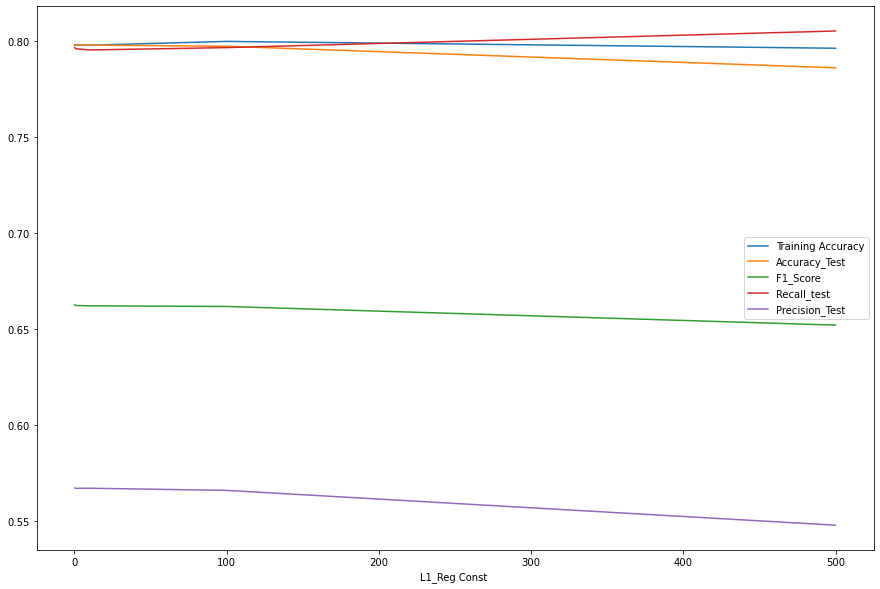

Learning Rate=2 


In [83]:
# Draw the curve for learning Rate vs F1_score
f,ax=plt.subplots(figsize=(15,10))
plt.plot(L1_Reg,evaluation_df['Training Accuracy'])
plt.plot(L1_Reg,evaluation_df['Accuracy_Test'])
plt.plot(L1_Reg,evaluation_df['F1_Score_test'])
plt.plot(L1_Reg,evaluation_df['Recall_test'])
plt.plot(L1_Reg,evaluation_df['Precision_Test'])
plt.legend(['Training Accuracy','Accuracy_Test','F1_Score','Recall_test','Precision_Test'])
plt.xlabel('L1_Reg Const ')
plt.show()
print('Learning Rate={} '.format(alpha))


### Comment on Result:
1. As With or without regularization there is not much impact on F1 Score. (F1 Score remains same for L1_Reg Const=100)

Loop is broke at: 304 epoch


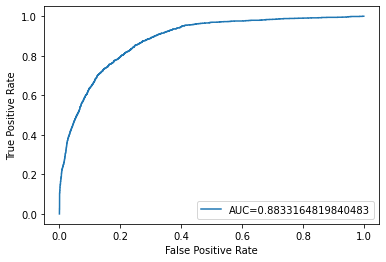

Roc Curve for L1 Regularization  0.1 and Learning rate 2  
Loop is broke at: 1259 epoch


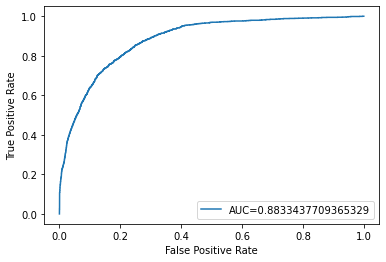

Roc Curve for L1 Regularization  1 and Learning rate 2  
Loop is broke at: 278 epoch


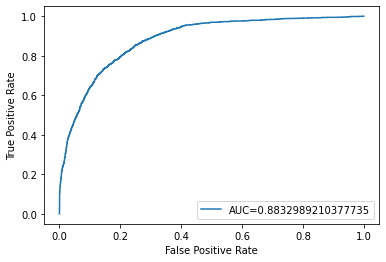

Roc Curve for L1 Regularization  10 and Learning rate 2  
Loop is broke at: 22 epoch


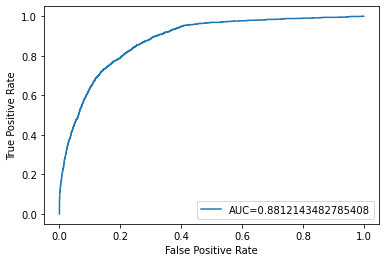

Roc Curve for L1 Regularization  100 and Learning rate 2  
Loop is broke at: 3 epoch


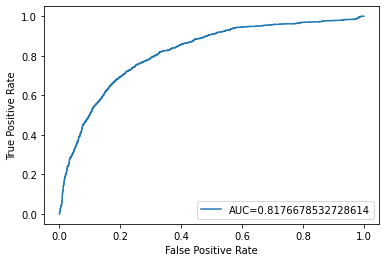

Roc Curve for L1 Regularization  500 and Learning rate 2  


In [92]:
# AUC_ROC for learning rate=2

#define metrics
from sklearn.metrics import roc_curve,roc_auc_score

# Lets see the variation ROC_AUC_Score by changing L1 Regularization constant
for i in [0.1,1,10,100,500]:
    B0,B,j,j_arr=logistic_regression_training(X_train,y_train,k,alpha=2,L1_Reg=i,L2_Reg=0)  # j is the final cost, J_arr store cost after each iteration
    y_score=sigmoid(X_test,B,B0)    # Map the probability for getting class 1 for each test case

    fpr, tpr, _ = roc_curve(y_test,  y_score)
    auc = roc_auc_score(y_test, y_score)
    
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    print("Roc Curve for L1 Regularization  {} and Learning rate {}  ".format(i,alpha))

#### Comment on ROC Curve:
    1. AUC Score remains same with and without L1 Regularization till L1 Regularization const=100
    2. Better option to choose without regularization algorithm, less computation is required.

## 5.4. Logistic Regression by Using all the feature (With L2 Regularization, with oversampling minor class)

Loop is broke at: 306 epoch


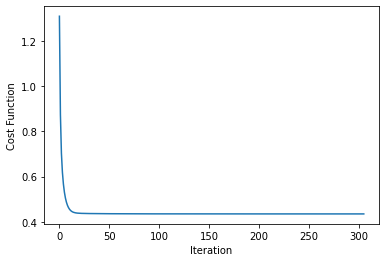

for learning_rate: 2 and L2 Regularition const:0.1 
Loop is broke at: 1372 epoch


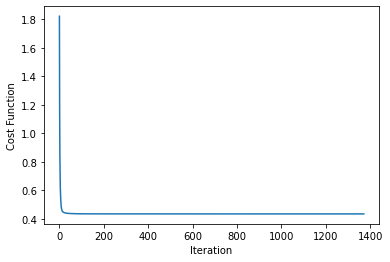

for learning_rate: 2 and L2 Regularition const:1 
Loop is broke at: 224 epoch


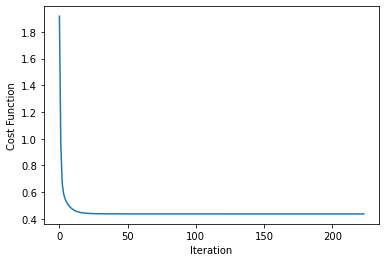

for learning_rate: 2 and L2 Regularition const:10 
Loop is broke at: 3317 epoch


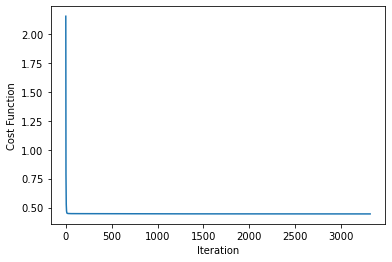

for learning_rate: 2 and L2 Regularition const:100 
Loop is broke at: 17 epoch


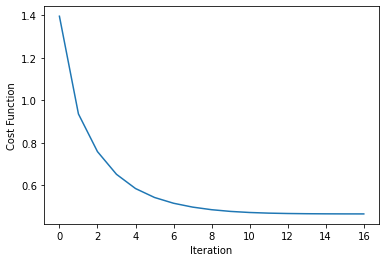

for learning_rate: 2 and L2 Regularition const:500 


In [93]:
# Training the the model: with L2 Regularization
k=5000  # Number of epoch
alpha=2  #Learing Rate
L1_Reg=0   #Regularization constan is zero
L2_Reg=[0.1,1,10,100,500] 
Final_cost=[]  # for saving final cost at different value of lambda
Accuracy_train=[]  # For logging accuracy on training set
Accuracy_test=[]   # For logging accuracy on test set
Precision_test=[]  # For logging Precision on test set
Recall_test=[]     # For logging Recall on test set
F1_score_test=[]   # For logging F1_Score on test set

for i in L2_Reg:
    B0,B,j,j_arr=logistic_regression_training(X_train,y_train,k,alpha,L1_Reg,i)
   
    # For plotting the curve:
    f=[itr for itr in range(len(j_arr))]
    jp=np.array(j_arr)
    jp=jp.reshape((len(jp),1))
    plt.plot(f,jp)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function')
    plt.show()
    print('for learning_rate: {} and L2 Regularition const:{} '.format(alpha,i))
    # Logging Final Cost
    Final_cost.append(j.tolist())
    # Model evaluation on training set
    y_pred_train=logistic_classification(X_train,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_train,y_pred_train)
    Accuracy_train.append(Accuracy)
    # Model Evaluation on training set
    y_pred=logistic_classification(X_test,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_test,y_pred)
    Accuracy_test.append(Accuracy)
    Precision_test.append(Precision)
    Recall_test.append(Recall)
    F1_score_test.append(F1_score)
    

In [94]:
evaluation_df=pd.DataFrame({'L2_Reg_const':L2_Reg,'Final Cost':Final_cost,'Training Accuracy':Accuracy_train,'Accuracy_Test':Accuracy_test,'Precision_Test':Precision_test,'Recall_test':Recall_test,'F1_Score_test':F1_score_test})
evaluation_df

,L2_Reg_const,Final Cost,Training Accuracy,Accuracy_Test,Precision_Test,Recall_test,F1_Score_test
0,0.1,[[0.4355108693386512]],0.798147,0.798402,0.567591,0.796170,0.662725
1,1.0,[[0.4356362010679684]],0.798021,0.797941,0.566843,0.796170,0.662214
2,10.0,[[0.43649596885610653]],0.798576,0.797634,0.566403,0.795553,0.661700
3,100.0,[[0.44461150152021306]],0.799611,0.796712,0.564685,0.798023,0.661377
4,500.0,[[0.4658417394343224]],0.795169,0.785802,0.546661,0.814083,0.654094


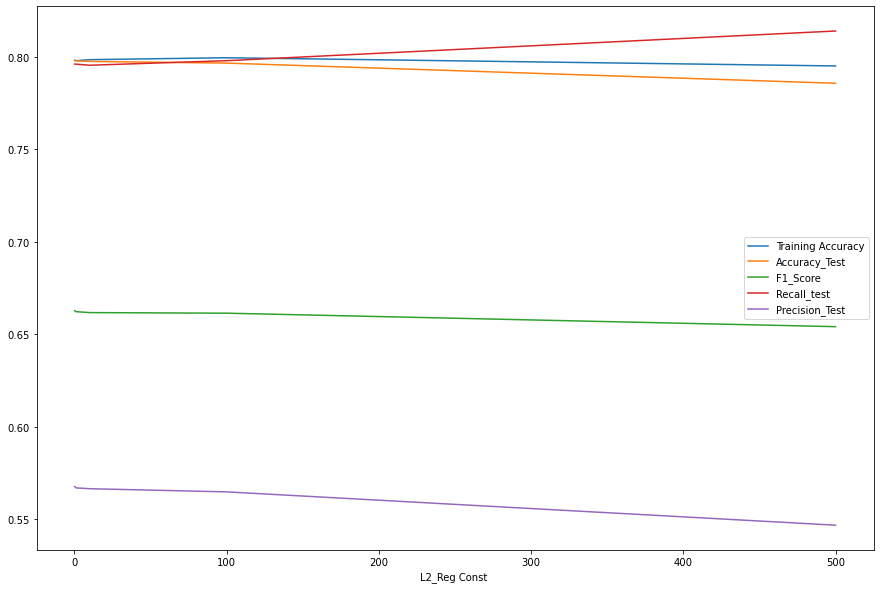

Learning Rate=2 


In [96]:
# Draw the curve for learning Rate vs F1_score
f,ax=plt.subplots(figsize=(15,10))
plt.plot(L2_Reg,evaluation_df['Training Accuracy'])
plt.plot(L2_Reg,evaluation_df['Accuracy_Test'])
plt.plot(L2_Reg,evaluation_df['F1_Score_test'])
plt.plot(L2_Reg,evaluation_df['Recall_test'])
plt.plot(L2_Reg,evaluation_df['Precision_Test'])
plt.legend(['Training Accuracy','Accuracy_Test','F1_Score','Recall_test','Precision_Test'])
plt.xlabel('L2_Reg Const ')
plt.show()
print('Learning Rate={} '.format(alpha))


### Comment on Result:
1. Negligible impact on F1 Score with L2 Regularization 

## 5.5. Logistic Regression by Using top 10 feature based on Mutual Information (without regularization , With oversampling of minor class

In [98]:
#Lets define X_train_, X_test_ having top 14 feature
X_train_=X_train[top_10_feature]
X_test_=X_test[top_10_feature]

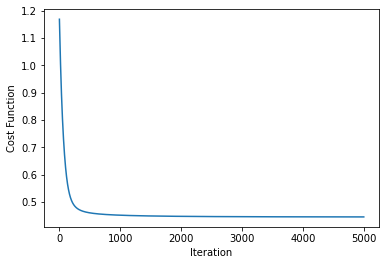

for learning_rate: 0.05  
Loop is broke at: 3491 epoch


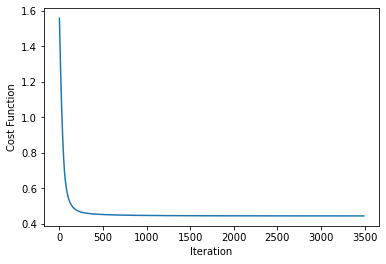

for learning_rate: 0.1  
Loop is broke at: 961 epoch


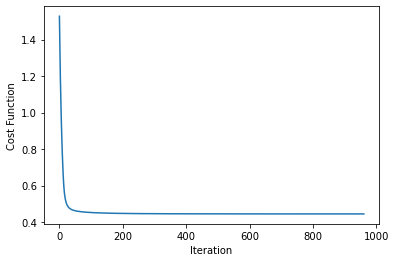

for learning_rate: 0.5  
Loop is broke at: 495 epoch


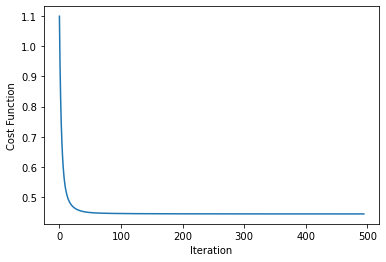

for learning_rate: 1  
Loop is broke at: 355 epoch


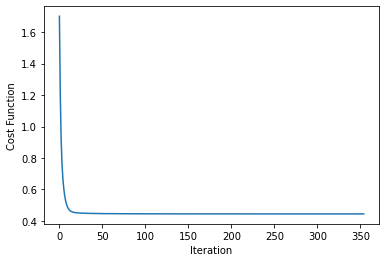

for learning_rate: 1.5  
Loop is broke at: 297 epoch


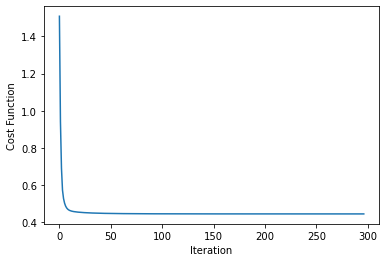

for learning_rate: 2  


In [99]:
# Training the the model: without Regularization
k=5000  # Number of epoch
alpha=[0.05,.1,0.5,1,1.5,2]  #Learing Rate
L1_Reg=0
L2_Reg=0 #Regularization constan is zero
Final_cost=[]  # for saving final cost at different value of lambda
Accuracy_train=[]  # For logging accuracy on training set
Accuracy_test=[]   # For logging accuracy on test set
Precision_test=[]  # For logging Precision on test set
Recall_test=[]     # For logging Recall on test set
F1_score_test=[]   # For logging F1_Score on test set

for i in alpha:
    B0,B,j,j_arr=logistic_regression_training(X_train_,y_train,k,i,L1_Reg,L2_Reg)
   
    # For plotting the curve:
    f=[itr for itr in range(len(j_arr))]
    jp=np.array(j_arr)
    jp=jp.reshape((len(jp),1))
    plt.plot(f,jp)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function')
    plt.show()
    print('for learning_rate: {}  '.format(i))
    # Logging Final Cost
    Final_cost.append(j.tolist())
    # Model evaluation on training set
    y_pred_train=logistic_classification(X_train_,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_train,y_pred_train)
    Accuracy_train.append(Accuracy)
    # Model Evaluation on training set
    y_pred=logistic_classification(X_test_,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_test,y_pred)
    Accuracy_test.append(Accuracy)
    Precision_test.append(Precision)
    Recall_test.append(Recall)
    F1_score_test.append(F1_score)
    

In [100]:
evaluation_df=pd.DataFrame({'Learing_rate':alpha,'Final Cost':Final_cost,'Training Accuracy':Accuracy_train,'Accuracy_Test':Accuracy_test,'Precision_Test':Precision_test,'Recall_test':Recall_test,'F1_Score_test':F1_score_test})
evaluation_df

,Learing_rate,Final Cost,Training Accuracy,Accuracy_Test,Precision_Test,Recall_test,F1_Score_test
0,0.05,[[0.44463397760812706]],0.798072,0.801475,0.572377,0.798641,0.666839
1,0.10,[[0.4444575709630245]],0.797844,0.802858,0.574468,0.800494,0.668903
2,0.50,[[0.4443922192582036]],0.797920,0.802551,0.574025,0.799876,0.668387
3,1.00,[[0.4443836162450641]],0.797920,0.802551,0.574091,0.799259,0.668216
4,1.50,[[0.4443807331552749]],0.797920,0.802551,0.574091,0.799259,0.668216
5,2.00,[[0.4443791999772534]],0.797870,0.802397,0.573836,0.799259,0.668043


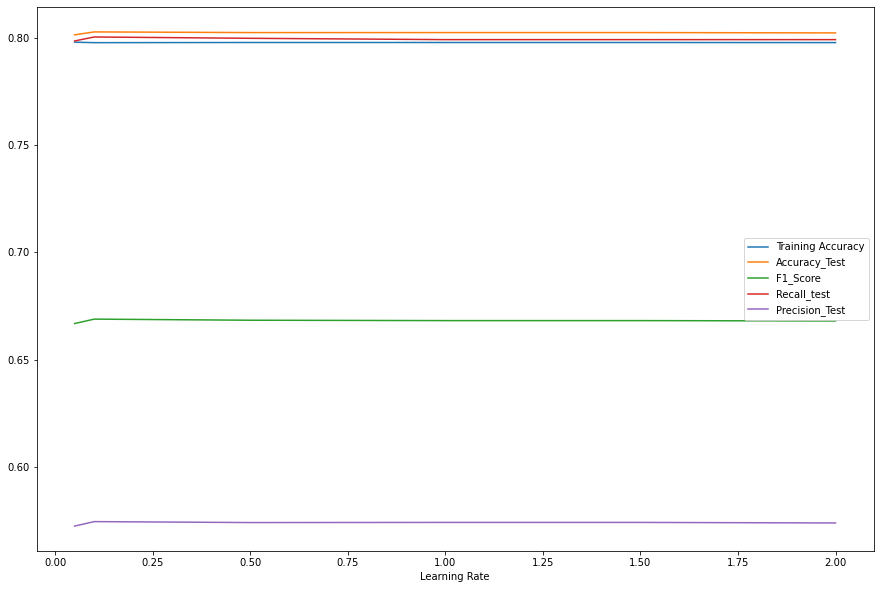

In [101]:
# Draw the curve for learning Rate vs F1_score
f,ax=plt.subplots(figsize=(15,10))
plt.plot(alpha,evaluation_df['Training Accuracy'])
plt.plot(alpha,evaluation_df['Accuracy_Test'])
plt.plot(alpha,evaluation_df['F1_Score_test'])
plt.plot(alpha,evaluation_df['Recall_test'])
plt.plot(alpha,evaluation_df['Precision_Test'])
plt.legend(['Training Accuracy','Accuracy_Test','F1_Score','Recall_test','Precision_Test'])
plt.xlabel('Learning Rate')
plt.show()


Loop is broke at: 291 epoch


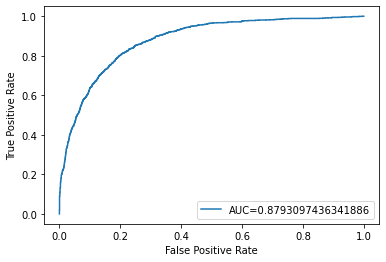

In [107]:
# AUC_ROC for learning rate=2
B0,B,j,j_arr=logistic_regression_training(X_train_,y_train,k,alpha=2,L1_Reg=0,L2_Reg=0)  # j is the final cost, J_arr store cost after each iteration
y_score=sigmoid(X_test_,B,B0)    # Map the probability for getting class 1 for each test case
#define metrics
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Comment on Result:
    1. By Selecting top 10 features gives similar F1 score as with selecting all the feature
    2. Better to use only top 10 feature based on MI_Score as it required less computation
    3. AUC Score is 0.879. Which is good score.

## 5.6. Logistic Regression using all the feature (without regularization , Without oversampling of minor class)

In [115]:
#Lets define X_train_, X_test_ having top 10 feature
X_train_,X_test_,y_train_,y_test_=train_test_split(train_data.drop('income',axis=1),train_data.income,test_size=0.2,random_state=20)

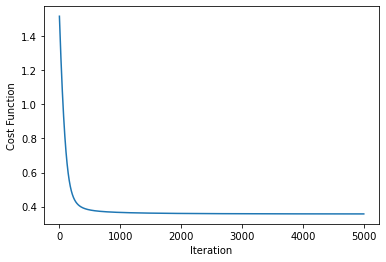

for learning_rate: 0.05  
Loop is broke at: 3457 epoch


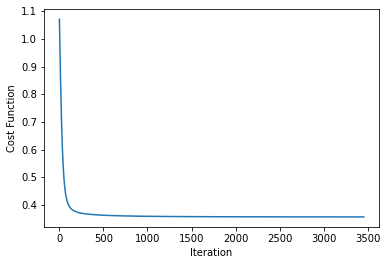

for learning_rate: 0.1  
Loop is broke at: 979 epoch


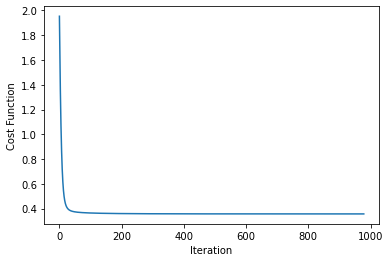

for learning_rate: 0.5  
Loop is broke at: 544 epoch


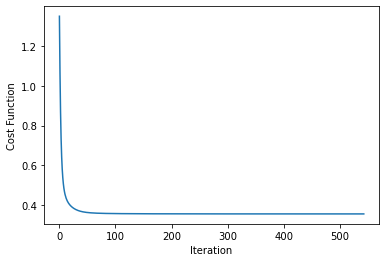

for learning_rate: 1  
Loop is broke at: 397 epoch


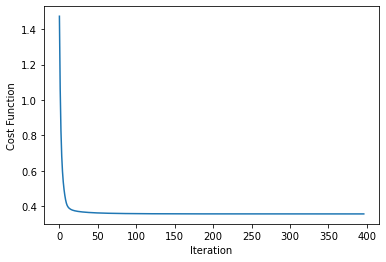

for learning_rate: 1.5  
Loop is broke at: 298 epoch


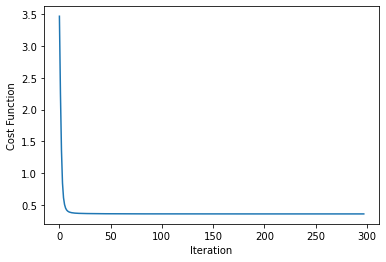

for learning_rate: 2  


In [116]:
# Training the the model: without Regularization
k=5000  # Number of epoch
alpha=[0.05,.1,0.5,1,1.5,2]  #Learing Rate
L1_Reg=0
L2_Reg=0 #Regularization constan is zero
Final_cost=[]  # for saving final cost at different value of lambda
Accuracy_train=[]  # For logging accuracy on training set
Accuracy_test=[]   # For logging accuracy on test set
Precision_test=[]  # For logging Precision on test set
Recall_test=[]     # For logging Recall on test set
F1_score_test=[]   # For logging F1_Score on test set

for i in alpha:
    B0,B,j,j_arr=logistic_regression_training(X_train_,y_train_,k,i,L1_Reg,L2_Reg)
   
    # For plotting the curve:
    f=[itr for itr in range(len(j_arr))]
    jp=np.array(j_arr)
    jp=jp.reshape((len(jp),1))
    plt.plot(f,jp)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function')
    plt.show()
    print('for learning_rate: {}  '.format(i))
    # Logging Final Cost
    Final_cost.append(j.tolist())
    # Model evaluation on training set
    y_pred_train=logistic_classification(X_train_,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_train_,y_pred_train)
    Accuracy_train.append(Accuracy)
    # Model Evaluation on training set
    y_pred=logistic_classification(X_test_,B,B0)
    Accuracy,Precision,Recall,F1_score=model_evaluation(y_test_,y_pred)
    Accuracy_test.append(Accuracy)
    Precision_test.append(Precision)
    Recall_test.append(Recall)
    F1_score_test.append(F1_score)
    

In [117]:
evaluation_df=pd.DataFrame({'Learing_rate':alpha,'Final Cost':Final_cost,'Training Accuracy':Accuracy_train,'Accuracy_Test':Accuracy_test,'Precision_Test':Precision_test,'Recall_test':Recall_test,'F1_Score_test':F1_score_test})
evaluation_df

,Learing_rate,Final Cost,Training Accuracy,Accuracy_Test,Precision_Test,Recall_test,F1_Score_test
0,0.05,[[0.3573303842990805]],0.838565,0.833589,0.742315,0.507103,0.602569
1,0.10,[[0.35707429131259255]],0.838680,0.834204,0.743682,0.508956,0.604327
2,0.50,[[0.35700710356852167]],0.838680,0.834665,0.745257,0.509574,0.605282
3,1.00,[[0.3570684828861878]],0.838795,0.834511,0.744585,0.509574,0.605061
4,1.50,[[0.35700813233969264]],0.838680,0.834819,0.745487,0.510191,0.605794
5,2.00,[[0.35699703335630556]],0.838642,0.834665,0.744815,0.510191,0.605572


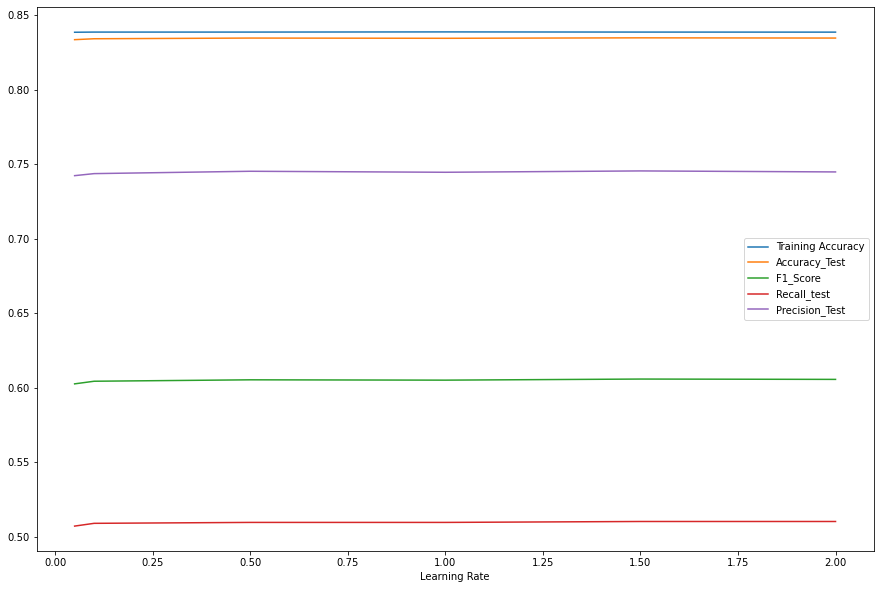

In [118]:
# Draw the curve for learning Rate vs F1_score
f,ax=plt.subplots(figsize=(15,10))
plt.plot(alpha,evaluation_df['Training Accuracy'])
plt.plot(alpha,evaluation_df['Accuracy_Test'])
plt.plot(alpha,evaluation_df['F1_Score_test'])
plt.plot(alpha,evaluation_df['Recall_test'])
plt.plot(alpha,evaluation_df['Precision_Test'])
plt.legend(['Training Accuracy','Accuracy_Test','F1_Score','Recall_test','Precision_Test'])
plt.xlabel('Learning Rate')
plt.show()

Loop is broke at: 302 epoch


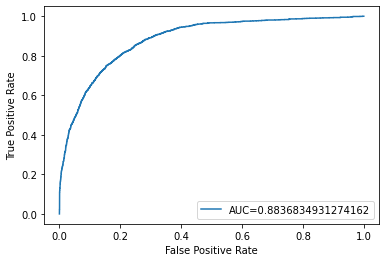

In [120]:
# AUC_ROC for learning rate=2
B0,B,j,j_arr=logistic_regression_training(X_train_,y_train_,k,alpha=2,L1_Reg=0,L2_Reg=0)  # j is the final cost, J_arr store cost after each iteration
y_score=sigmoid(X_test_,B,B0)    # Map the probability for getting class 1 for each test case
#define metrics
fpr, tpr, _ = roc_curve(y_test_,  y_score)
auc = roc_auc_score(y_test_, y_score)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Comment on Result:
     1.Without oversampling and using all the feature AUC is 0.883 which is good 
     2.Lets compare the the evaluation metrics when learning rate=2 and without Regularization
                              
                              Precision     Recall    F1 Score   AUC Score
       With Oversampling:      0.56          0.79      0.66         0.88
       Without Oversampling:   0.74          0.51      0.60         0.88 
     By this comparison it is clear that there is no impact in AUC score. But without oversampling the minor class the
     Precision increases but Recall decreases F1 Score also decreases.

## 5.7. Random Forest Classifier using all the feature (Without oversampling of minor class)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=200,)

In [124]:
model=rc.fit(X_train_,y_train_)

In [125]:
y_pred_=model.predict(X_test_)

In [127]:
Accuracy,Precision,Recall,F1_score=model_evaluation(y_test_,y_pred_)

In [129]:
print("Accuracy: {} \nPrecision:{} \nRecall:{} \nF1-Score:{} ".format(Accuracy,Precision,Recall,F1_score))

Accuracy: 0.8514136447449293 
Precision:0.7507692307692307 
Recall:0.60284126003706 
F1-Score:0.6687221651250429 


## 5.8. Random Forest Classifier using all the feature (With oversampling of minor class)

In [130]:
model_2=rc.fit(X_train,y_train)

In [131]:
y_pred_=model_2.predict(X_test)

In [132]:
Accuracy,Precision,Recall,F1_score=model_evaluation(y_test,y_pred)

In [133]:
print("Accuracy: {} \nPrecision:{} \nRecall:{} \nF1-Score:{} ".format(Accuracy,Precision,Recall,F1_score))

Accuracy: 0.8346650276582668 
Precision:0.7448151487826871 
Recall:0.5101914762198888 
F1-Score:0.6055718475073314 


# Conclusion:
    1.By using Logistic Regression Maximum F1 Score achieved is 0.66 with oversampling of minor class
    2.By using Random Forest Classifier F1 Score Achieved is 0.66 without oversampling of minor class
    3.Random Forest classifier is working good without oversampling and Logistic Regression working well with oversampling 
    of minor class